"Non-Traffic Citations" - Maggie Lin

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

Here's the overall data of the Non-Traffic Citations

In [10]:
neighborhood = gpd.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip")
File = "https://data.wprdc.org/datastore/dump/6b11e87d-1216-463d-bbd3-37460e539d86"
data = pd.read_csv(File)
data.head(10)

,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1078081,16157849,M,B,29.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
1,1078082,16157849,M,W,21.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
2,1078083,16159579,NaN,NaN,NaN,2016-08-25T11:10:00,"NORTH PARK PITTSBURGH, PA",5505 Public Drunkenness,Allegheny Center,1,2204,NaN,NaN,NaN,NaN
3,1078084,16159780,M,B,22.0,2016-08-25T16:42:00,"7200 Block FRANKSTOWN AV PITTSBURGH, PA","6501(a)(1) Scattering Rubbish; Any waste, dang...",Homewood South,5,1303,9.0,2.0,-79.896254,40.457329
4,1078085,16161591,F,W,22.0,2016-08-28T00:58:00,"6100 Block BERLIN WY PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,Upper Lawrenceville,2,1011,7.0,2.0,-79.946664,40.485403
5,1078086,16162400,M,W,28.0,2016-08-29T10:34:00,"MARKET ST & 5TH AV PITTSBURGH, PA","5507(a) Obstructing highway, railroad or publi...",Golden Triangle/Civic Arena,2,201,6.0,6.0,-80.002109,40.441383
6,1078087,16162524,M,B,56.0,2016-08-29T13:00:00,"MARKET ST & FORBES AV PITTSBURGH, PA",601.08 (a) Open Container Law,Golden Triangle/Civic Arena,1,201,6.0,6.0,-80.002190,40.440584
7,1078088,16162524,M,W,44.0,2016-08-29T13:00:00,"MARKET ST & FORBES AV PITTSBURGH, PA",601.08 (a) Open Container Law,Golden Triangle/Civic Arena,1,201,6.0,6.0,-80.002190,40.440584
8,1078089,16083638,M,W,50.0,2016-05-07T16:30:00,"40TH ST & DAVISON ST PITTSBURGH, PA",5505 Public Drunkenness,Lower Lawrenceville,2,603,7.0,2.0,-79.960903,40.467585
9,1078090,16077700,M,B,24.0,2016-04-29T01:05:00,"80 Block S 15TH ST PITTSBURGH, PA",3304(a)(5) CRIMINAL MISCHIEF - Intentionally D...,South Side Flats,3,1702,3.0,3.0,-79.983573,40.428555


Here's the column of neighborhood where all the criminal offenses take place in

In [3]:
pd.DataFrame(data["NEIGHBORHOOD"])

,NEIGHBORHOOD
0,North Oakland
1,North Oakland
2,Allegheny Center
3,Homewood South
4,Upper Lawrenceville
...,...
14500,Central Business District
14501,Central Business District
14502,Central Business District
14503,Central Business District


Here's the total non-traffic events going on in each neighborhood

In [4]:
dic = {}

for i in neighborhood["hood"]:
    dic[i] = 0
    
for index,row in data.iterrows():
    neighborhood = row['NEIGHBORHOOD']
    
    if neighborhood in dic:
        dic[neighborhood] += 1
print(dic)


{'Point Breeze North': 41, 'Squirrel Hill North': 167, 'Garfield': 103, 'Bedford Dwellings': 63, 'Knoxville': 225, 'Homewood South': 214, 'Middle Hill': 100, 'Oakwood': 9, 'North Oakland': 192, 'Duquesne Heights': 20, 'Glen Hazel': 28, 'East Liberty': 216, 'Westwood': 31, 'Morningside': 24, 'Lincoln Place': 39, 'Perry North': 42, 'Northview Heights': 63, 'Homewood North': 202, 'Arlington Heights': 7, 'Lower Lawrenceville': 30, 'Larimer': 150, 'Lincoln-Lemington-Belmar': 134, 'Bluff': 137, 'Fairywood': 14, 'Brookline': 300, 'Hays': 8, 'Beltzhoover': 78, 'Greenfield': 149, 'East Carnegie': 22, 'North Shore': 542, 'Allentown': 179, 'Bon Air': 25, 'Allegheny West': 16, 'Crafton Heights': 61, 'Manchester': 35, 'Marshall-Shadeland': 113, 'Highland Park': 49, 'New Homestead': 8, 'Central Northside': 0, 'Polish Hill': 17, 'Overbrook': 54, 'Friendship': 16, 'Homewood West': 46, 'Central Business District': 1767, 'East Allegheny': 342, 'Allegheny Center': 155, 'Central Oakland': 650, 'Brighton H

In [5]:
df = pd.DataFrame.from_dict(dic, orient="index", columns = ["count"])
display(df)

,count
Point Breeze North,41
Squirrel Hill North,167
Garfield,103
Bedford Dwellings,63
Knoxville,225
...,...
Regent Square,9
Terrace Village,37
Elliott,126
South Side Flats,3269


In [6]:
item = df.loc["Point Breeze North","count"]
print(item)

41


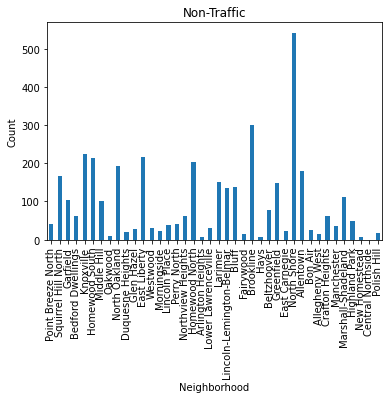

In [7]:
df.iloc[:40].plot(kind="bar", legend=None)
plt.title("Non-Traffic")
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.show()

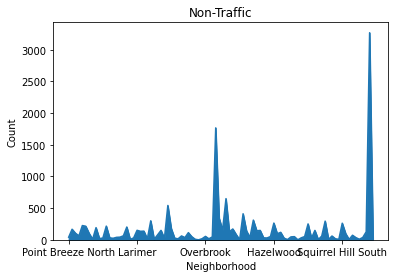

In [8]:
df.plot(kind="area", legend=None)
plt.title("Non-Traffic")
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.show()

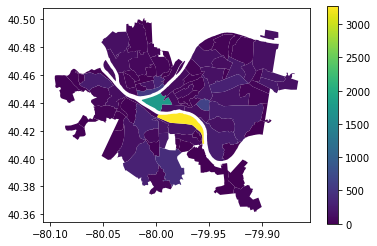

In [11]:
neighborhood["Traffic"] = dic.values()
neighborhood.plot(column = "Traffic", legend = True)